# Breast Cancer Detection

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn

In [40]:
names=['ID number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df=pd.read_csv('breast-cancer-wisconsin.data')
df.head()
df.replace('?',-99999, inplace=True)

In [41]:
df.columns=names

df.drop(['ID number','Uniformity of Cell Shape'],1, inplace=True)
df.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,5,7,10,3,2,1,2
1,3,1,1,2,2,3,1,1,2
2,6,8,1,3,4,3,7,1,2
3,4,1,3,2,1,3,1,1,2
4,8,10,8,7,10,9,7,1,4


In [42]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


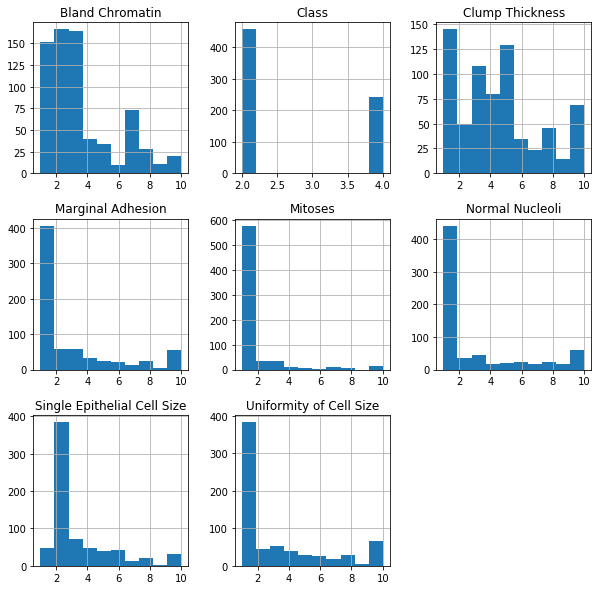

In [43]:
df.hist(figsize=(10,10))
plt.show()

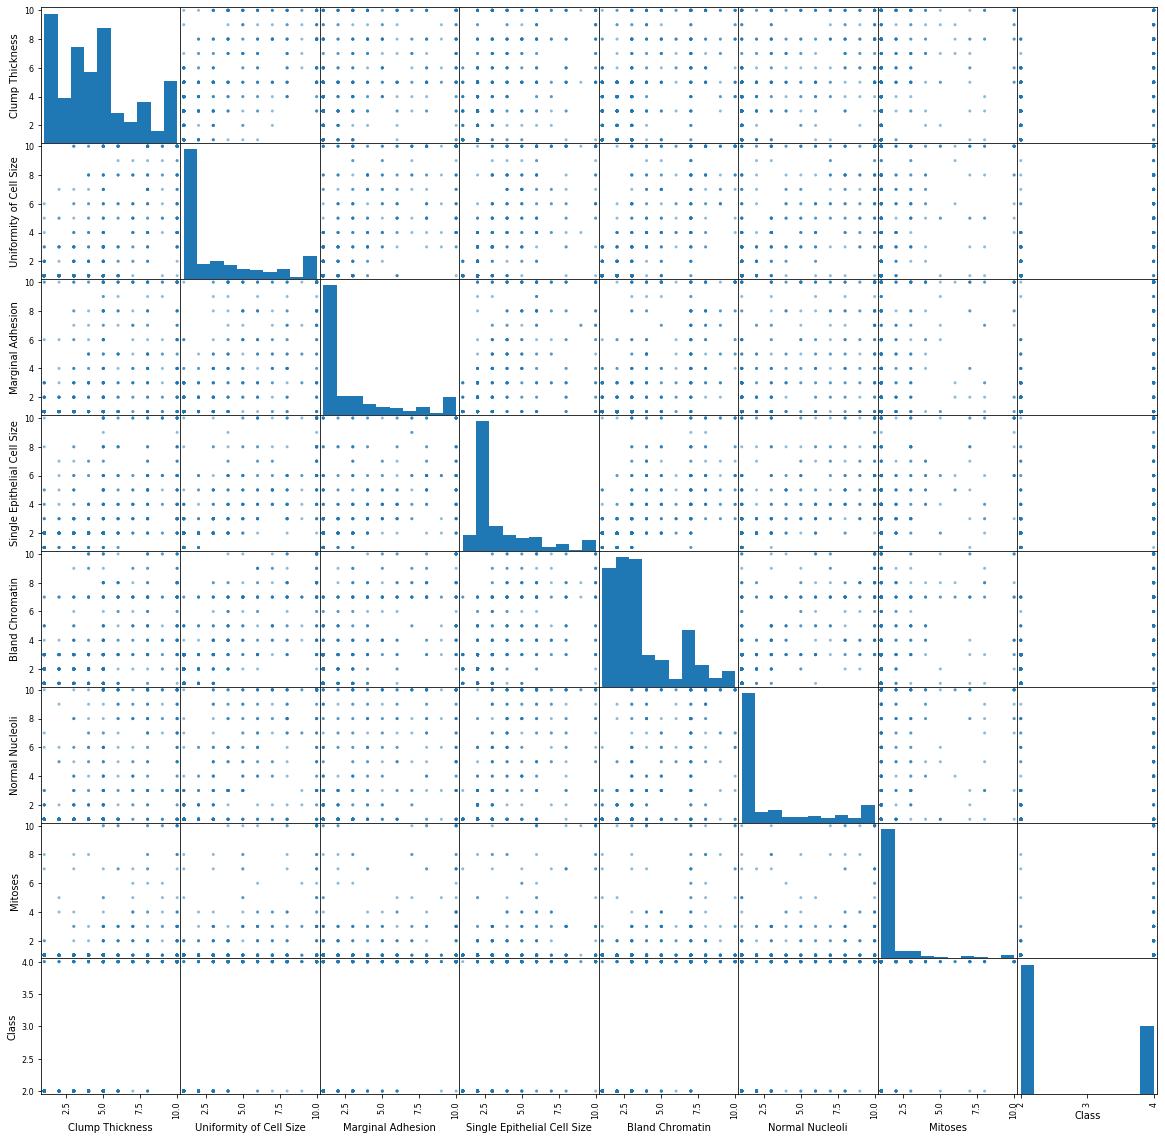

In [44]:
scatter_matrix(df, figsize=(20,20))
plt.show()

In [45]:
X=np.array(df.drop(['Class'],1))
y=np.array(df['Class'])

In [46]:
import sklearn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [47]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3)

In [48]:
models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

In [49]:
for name,model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))

0.9619047619047619
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       133
           4       0.97      0.92      0.95        77

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

0.9619047619047619
              precision    recall  f1-score   support

           2       0.98      0.95      0.97       133
           4       0.93      0.97      0.95        77

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
data=[[1,3,1,5,6,8,1,100]]
x_train.shape

(488, 8)

In [66]:
for name,model in models:
    print(model.predict(data))

[4]
[4]


In [ ]:
import nltk

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
pred=reg.predict(x_test)
print(accuracy_score(y_test,pred))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X,y)

In [ ]:
print(accuracy_score(y,knn.predict(X)))

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [53]:
print(accuracy_score(y_test,knn.predict(x_test)))

0.9476190476190476


In [54]:
k_range=range(1,20)
score=[]

In [55]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score.append(accuracy_score(y_test,knn.predict(x_test)))

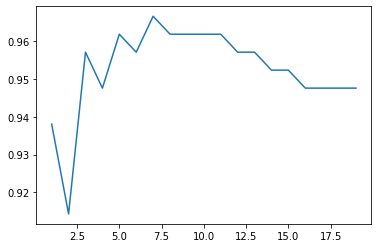

In [56]:
plt.plot(k_range,score)

In [61]:
reg=KNeighborsClassifier(n_neighbors=7)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
print(accuracy_score(y_test,pred))

0.9666666666666667


In [62]:
import seaborn as sb

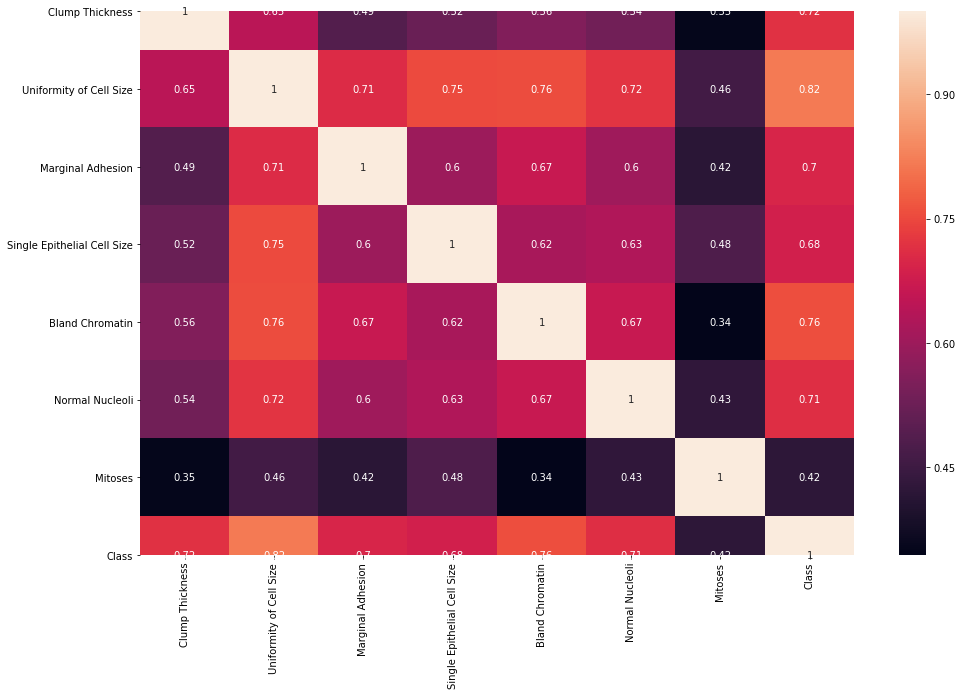

In [63]:
plt.figure(figsize=(16,10))
sb.heatmap(df.corr(), annot=True)